In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## load data

In [2]:
raw_df = pd.read_csv("student-mat.csv", sep=";")
raw_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## shape and info about dataset

In [4]:
raw_df.shape
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
raw_df.to_csv("student_raw.csv", index=False)

## validating dataset

In [8]:
raw_df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [7]:
raw_df.duplicated().sum()

np.int64(0)

As the dataset is downloaded from the internet directly and its already been processed before there are no null or missing values

## TARGET VARIABLE CREATION (CLASSIFICATION)

We convert G3 into performance category label

In [11]:
def performance_label(grade):
    if grade < 10:
        return "Low"
    elif grade < 15:
        return "Medium"
    else:
        return "High"

raw_df["performance"] = raw_df["G3"].apply(performance_label)

In [12]:
raw_df["performance"].value_counts()

,count
performance,
Medium,192
Low,130
High,73


Lets move into data cleaning process

## DATA CLEANING & PREPARATION

### Dropping columns
We gonna remove g1 and g2 as we are working on the combined grade g3

In [13]:
clean_df = raw_df.drop(columns=["G1", "G2"])

### Encode binary categorical variables


In [14]:
binary_cols = [
    "school", "sex", "address", "famsize", "Pstatus",
    "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet", "romantic"
]

for col in binary_cols:
    clean_df[col] = clean_df[col].astype("category").cat.codes

Encoding multi categorical variables

In [15]:
multi_cat_cols = ["Mjob", "Fjob", "reason", "guardian"]
clean_df = pd.get_dummies(clean_df, columns=multi_cat_cols, drop_first=True)

In [16]:
clean_df.to_csv("student_clean.csv", index=False)

In [17]:
clean_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


# EXPLORATORY DATA ANALYSIS (EDA)

## Grade Distribution

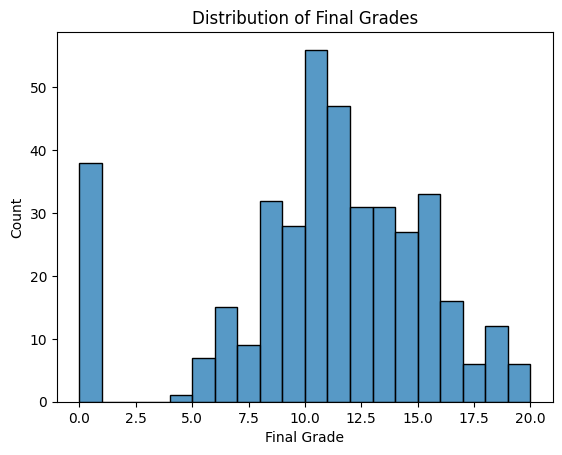

In [18]:
plt.figure()
sns.histplot(raw_df["G3"], bins=20)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

The distribution shows that most students score in the mid-range of grades, with fewer students achieving very high or very low scores. This suggests that extreme academic outcomes are less common, while average performance dominates the dataset. The spread of grades indicates sufficient variability for further analysis and modeling.

## Study Time vs Final Grade

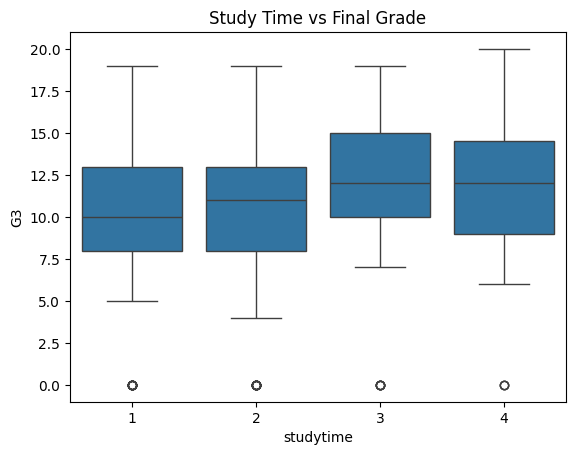

In [19]:
plt.figure()
sns.boxplot(x="studytime", y="G3", data=raw_df)
plt.title("Study Time vs Final Grade")
plt.show()

Students who report higher study time levels generally tend to have higher median grades. While some students with low study time still achieve good grades, increased study time appears to be associated with improved academic performance overall. This suggests that study time is an important contributing factor, though not the only determinant of success.

## Absences vs Final Grade

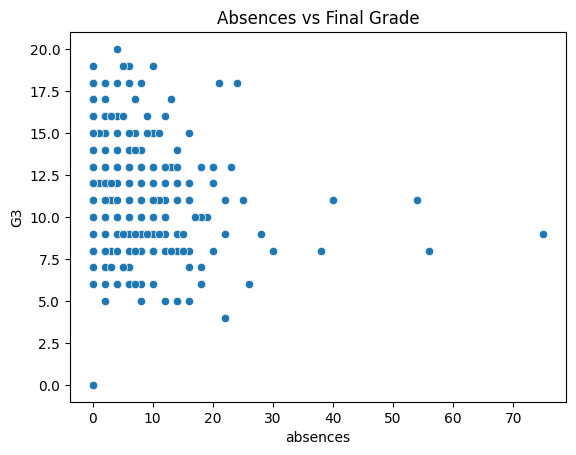

In [20]:
plt.figure()
sns.scatterplot(x="absences", y="G3", data=raw_df)
plt.title("Absences vs Final Grade")
plt.show()

A clear negative trend is visible, where students with higher numbers of absences tend to have lower final grades. While a few students with many absences still perform well, the overall pattern indicates that frequent absences are associated with poorer academic outcomes. Attendance appears to play a significant role in student performance.

## Gender Distribution

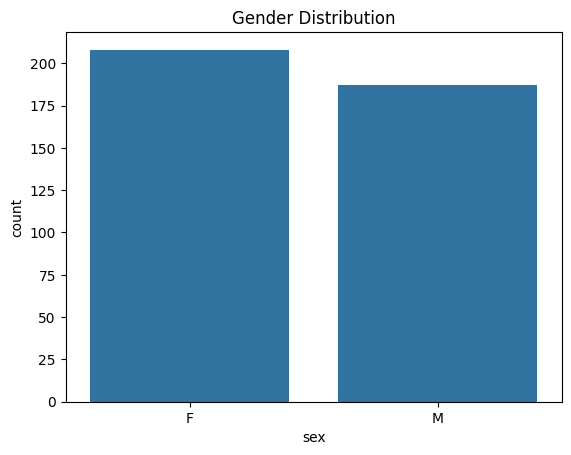

In [21]:
plt.figure()
sns.countplot(x="sex", data=raw_df)
plt.title("Gender Distribution")
plt.show()

The dataset contains a relatively balanced representation of male and female students, with no extreme imbalance. This balance reduces the risk of bias in gender-based analysis and allows for meaningful comparison between groups in later stages of the project.

## Parental Education

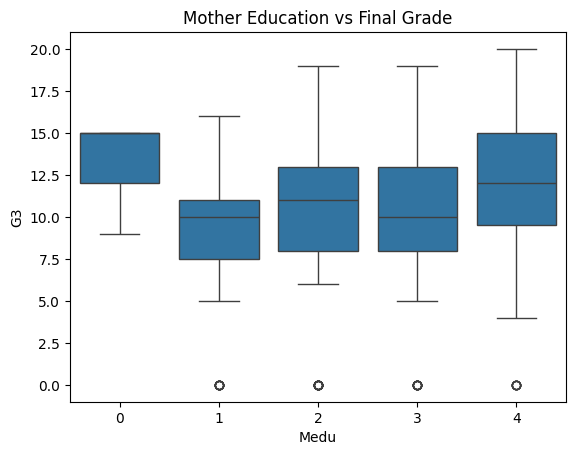

In [22]:
plt.figure()
sns.boxplot(x="Medu", y="G3", data=raw_df)
plt.title("Mother Education vs Final Grade")
plt.show()

Students whose parents have higher education levels tend to show slightly higher median grades. However, there is still considerable overlap across education levels, indicating that parental education alone does not determine academic success. It acts more as a supportive factor rather than a decisive one.

## Alcohol Consumption

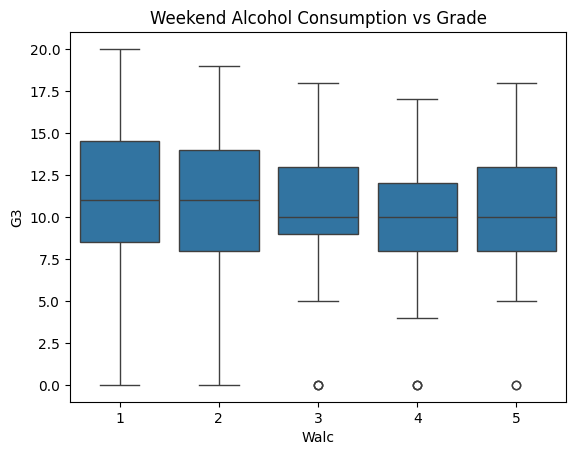

In [23]:
plt.figure()
sns.boxplot(x="Walc", y="G3", data=raw_df)
plt.title("Weekend Alcohol Consumption vs Grade")
plt.show()

Higher levels of weekend alcohol consumption are generally associated with lower median grades. Students with low alcohol consumption tend to perform better academically. This pattern suggests that lifestyle choices may influence academic focus and performance.

## Internet Access vs Performance

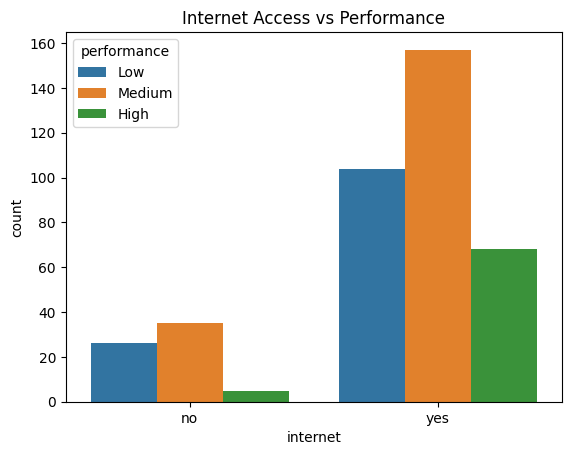

In [24]:
plt.figure()
sns.countplot(x="internet", hue="performance", data=raw_df)
plt.title("Internet Access vs Performance")
plt.show()

Students with internet access are more frequently represented in the medium and high performance categories. However, internet access alone does not guarantee high performance, indicating that access to resources must be combined with effective study habits and support systems.

## Family Support

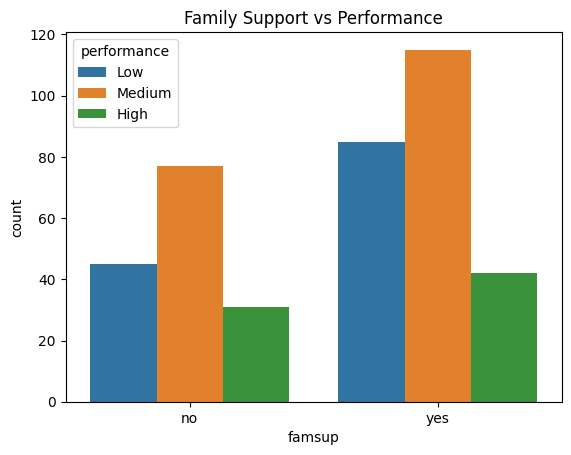

In [25]:
plt.figure()
sns.countplot(x="famsup", hue="performance", data=raw_df)
plt.title("Family Support vs Performance")
plt.show()

Students who receive family support are more likely to fall into higher performance categories compared to those without support. This suggests that encouragement and assistance from family members positively influence academic outcomes.

## Age Distribution

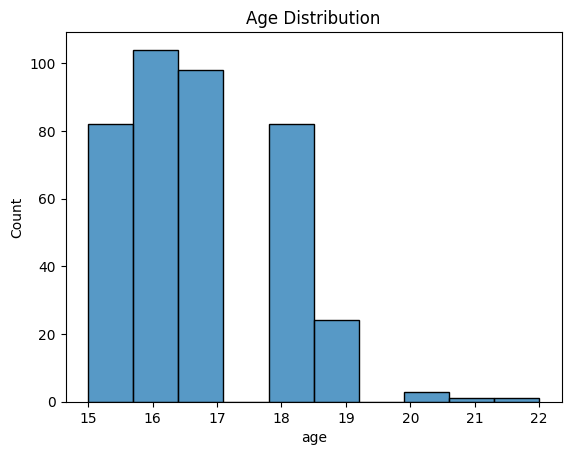

In [26]:
plt.figure()
sns.histplot(raw_df["age"], bins=10)
plt.title("Age Distribution")
plt.show()

Most students fall within a narrow age range, indicating a relatively homogeneous academic cohort. This reduces age-related variability and suggests that differences in performance are more likely due to behavioral or environmental factors rather than age.

## Past Failures Impact

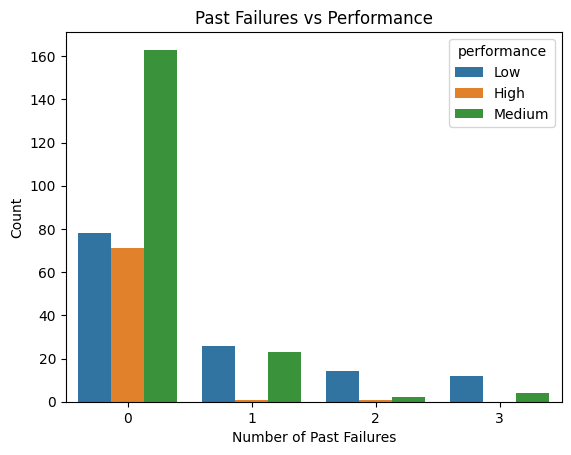

In [35]:
plt.figure()
sns.countplot(x="failures", hue="performance", data=raw_df)
plt.title("Past Failures vs Performance")
plt.xlabel("Number of Past Failures")
plt.ylabel("Count")
plt.show()

Students with no prior failures are more likely to achieve medium or high performance. As the number of past failures increases, the proportion of low-performing students rises significantly. This suggests that earlier academic difficulties often persist if not addressed in time.

## Lifestyle vs Academics

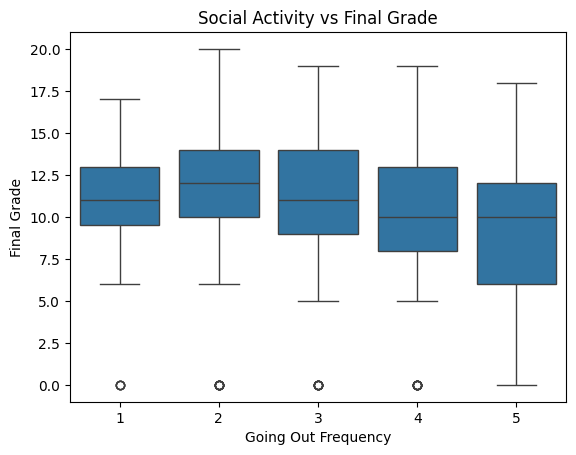

In [36]:
plt.figure()
sns.boxplot(x="goout", y="G3", data=raw_df)
plt.title("Social Activity vs Final Grade")
plt.xlabel("Going Out Frequency")
plt.ylabel("Final Grade")
plt.show()

Moderate levels of social activity do not appear to negatively impact grades, but higher frequencies of going out are associated with lower median grades. This indicates that excessive social activity may reduce time available for academic focus.

## some additional charts

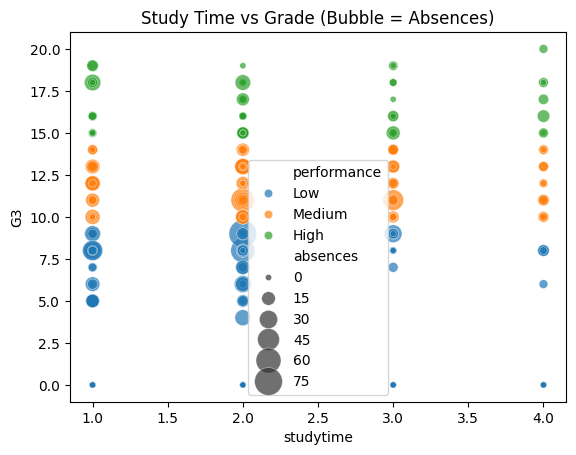

In [37]:
plt.figure()
sns.scatterplot(
    x="studytime",
    y="G3",
    size="absences",
    hue="performance",
    data=raw_df,
    sizes=(20, 400),
    alpha=0.7
)
plt.title("Study Time vs Grade (Bubble = Absences)")
plt.show()

Students with higher study time and fewer absences tend to achieve higher grades. Larger bubbles (more absences) are more common among lower-performing students. This multivariate visualization highlights how study habits and attendance jointly influence academic outcomes.

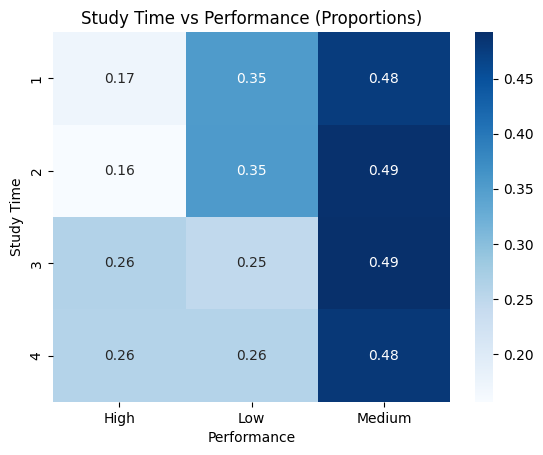

In [39]:
pivot = pd.crosstab(raw_df["studytime"], raw_df["performance"], normalize="index")

plt.figure()
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Study Time vs Performance (Proportions)")
plt.xlabel("Performance")
plt.ylabel("Study Time")
plt.show()

Higher study time levels have a greater proportion of medium and high-performing students. Lower study time levels are dominated by low and medium performance. This proportional view clearly highlights trends that are less visible in raw counts.

In [42]:
pip install plotly

In [49]:
fig = px.scatter(
    raw_df,
    x="studytime",
    y="G3",
    color="performance",
    size="absences",
    hover_data=["age", "sex"],
    title="Study Time vs Final Grade (Interactive)"
)

fig.show()
fig.write_html("studytime_vs_finalgrade.html")


The interactive view reveals individual variability within performance categories. Even among students with similar study time, grades can vary widely, indicating that multiple factors contribute to academic outcomes. This plot supports deeper exploratory analysis beyond static summaries.

In [48]:
fig = px.parallel_coordinates(
    raw_df,
    dimensions=["studytime", "absences", "G3", "goout", "Walc"],
    color=raw_df["G3"],
    title="Parallel Coordinates of Student Behavior"
)

fig.show()
fig.write_html("parallel_coordinates.html")

Students with higher grades generally show consistent patterns of moderate study time, lower absences, and controlled lifestyle behaviors. Lower-performing students exhibit more scattered patterns across dimensions, suggesting less consistency in academic and behavioral factors.

# API DATA COLLECTION

In [29]:
url = "https://api.worldbank.org/v2/country/PRT/indicator/SE.XPD.TOTL.GD.ZS?format=json"
response = requests.get(url)
data = response.json()

In [30]:
edu_spending = [
    entry["value"]
    for entry in data[1]
    if entry["value"] is not None
][0]

edu_spending

4.55159997940063

In [31]:
clean_df["edu_spending_gdp"] = edu_spending

In [33]:
clean_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,edu_spending_gdp
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,True,False,False,False,True,False,4.5516
1,0,0,17,1,0,1,1,1,1,2,...,False,True,False,False,False,False,False,False,False,4.5516
2,0,0,15,1,1,1,1,1,1,2,...,False,True,False,False,False,True,False,True,False,4.5516
3,0,0,15,1,0,1,4,2,1,3,...,False,False,True,False,True,False,False,True,False,4.5516
4,0,0,16,1,0,1,3,3,1,2,...,False,True,False,False,True,False,False,False,False,4.5516
